# Аналитическое решение задачи регрессии

## Вывод решения в векторной форме

Пусть $ X \in \mathbb{R}^{n \times d} $ — матрица объектов-признаков, $ w \in \mathbb{R}^{d\times 1} $ — вектор весов, $Xw\in\mathbb{R}^{n \times 1}$ - предсказания модели.  $ y \in \mathbb{R}^{n\times 1} $ — вектор целевых значений.



Функция потерь для линейной регрессии:
$$L(w) = \|Xw-y\|^2$$
Раскрываем норму квадрата вектора
$$L(w) = (Xw-y)^T(Xw-y)$$
Раскрываем скобки
$$L(w) = (Xw)^TXw-(Xw)^Ty - y^TXw+ y^Ty $$
$$L(w) = (Xw)^TXw-2(Xw)^Ty + y^Ty$$
$$L(w) = w^TX^TXw-2w^TX^Ty + y^Ty$$
Берем производную по $w$ для каждого члена уравнения 
$$\frac {d}{dw} (w^TX^TXw) = 2X^TXw$$
$$\frac {d}{dw} (-2w^TX^Ty ) = -2X^Ty$$
$$\frac {d}{dw} (y^Ty) = 0$$
Итоговая производная
$$\frac {dL}{dw} = 2X^TXw - 2X^Ty + 0$$
Приравниваем к нулю 
$$\frac {dL}{dw} = 2X^TXw - 2X^Ty = 0 $$
Делим обе стороны на 2
$$ X^TXw - X^Ty = 0 $$
Переносим $- X^Ty$ вправо
$$ X^TXw = X^Ty $$
Умножаем обе части на обратную матрицу $(X^TX)^{-1}$
$$ (X^TX)^{-1}X^TXw = (X^TX)^{-1}X^Ty $$
Упрощаем левую часть, $(X^TX)^{-1}$ и $X^TX$ сокращаются
$$ w = (X^TX)^{-1}X^Ty$$
## Аналитическое решение линейной регрессии - $w = (X^TX)^{-1}X^Ty$




# Что изменяется в решении, когда к функции потерь добавляются регуляризации L1 и L2?

## Обе регуляризации добавляют штраф за большие веса , что припятствует переобучению и улучшению показателей variance на тестовых выборках
### L2-регуляризация или Ridge-регуляризация добавляет к функции потерь линейной регрессии новый член $\lambda \|w\|^2$, где $\lambda$ - коэффицент штрафа, $\|w\|^2$ - сумма квадратов весов
Функция потерь линейной регрессии с L2-регуляризацией
$$L_{\text{Ridge}}(w) = \|(Xw-y)\|^2 + \lambda \|w\|^2  $$
$$L_{\text{Ridge}}(w) = w^TX^TXw-2w^TX^Ty + y^Ty + \lambda w^Tw$$
Берем производную по $w$
$$\frac{dL_{\text{Ridge}}}{dw} =  2X^TXw - 2X^Ty + 2 \lambda w + 0$$
Приравниваем к нулю и делим обе стороны на 2
$$\frac{dL_{\text{Ridge}}}{dw} =  X^TXw - X^Ty +  \lambda w  = 0 $$
Переносим - X^Ty вправо
$$X^TXw +  \lambda w  = X^Ty  $$
Выносим общий множитель $w$ за скобки справа
$$(X^TX +  \lambda I)w  = X^Ty  $$
Умножаем обе стороны на обратную матрицу $(X^TX +  \lambda I)^{-1}$
$$w  = (X^TX +  \lambda I)^{-1}X^Ty  $$
### В отличии от Ridge-регуляризации , L1-регуляризация или Lasso-регуляризация добавляет $\lambda |w|$, где $|w|$ - это сумма абсолютных значений(модулей) весов. 
$$L_{\text{Lasso}}(w) = \|(Xw-y)\|^2 + \lambda |w|  $$
### У нее нет аналитического решения так как функция L1-регуляризации не дифференцируема в точках, где $w_{\text{i}} = 0$, так как функция $w_{\text{i}}$ имеет разрыв производной (острый угол) в точке 0, из-за чего невозможно выразить градиент в аналитическом виде, как в случае Ridge-регуляризации"
### Поэтому для Lasso применяют численные методы оптимизации, например:

  #### • координатный спуск

  #### • субградиентные методы


# Объясните, почему L1-регуляризация часто используется для отбора признаков. 
## Почему после обучения модели многие веса оказываются равны нулю?


L1-регуляризация (Lasso) добавляет к функции потерь штраф в виде суммы модулей весов:
$$L_{\text{Lasso}}(w) = \|(Xw-y)\|^2 + \lambda |w|  $$
Алгоритм выбирает Lasso оставить слабый признак и заплатить штраф или занулить вес и $\lambda|w|$.
Если признак не коррелирует с таргетом → модель не может использовать его для предсказания

Значит, изменение ошибки $\|(Xw-y)\|^2$ при его включении почти нулевое

Тогда штраф $\lambda|w|$ становится доминирующим, и признак зануляется

Другими если снижение ошибки $\|(Xw-y)\|^2$ от признака меньше  , чем штраф чем штраф за его вес $\lambda|w|$, то алгоритм зануляет вес признака

### Вывод:
Если признак плохо влияет на предсказание (например, слабо коррелирует с таргетом), то добавление его веса мало влияет на ошибку, но увеличивает штраф. Алгоритм Lasso решает, что выгоднее обнулить вес, чем держать слабый признак, и таким образом автоматически выполняет отбор признаков.


С геометрической точки зрения, L1-норма образует ромбовидные области уровня с острыми углами на осях. Минимум функции часто "прилипает" к этим углам — то есть к точкам, где один или несколько весов точно равны нулю.

В результате модель становится разреженной, проще для интерпретации и менее подверженной переобучению.

## Объясните, как можно использовать те же самые модели (линейная регрессия, Ridge и т. д.), но при этом обеспечить возможность подгонки нелинейных зависимостей.

###  Пусть у нас есть зависимость:


$$ y = 2x^2 + 3x + 1 $$
Это **парабола** 

Сгенерируем дата сет с такой зависимостью и добавим шум

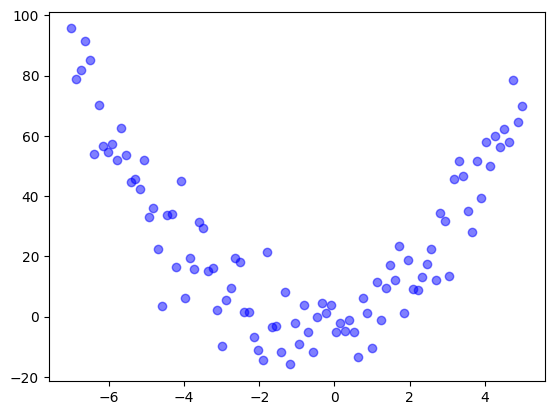

In [213]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = np.linspace(-7, 5, 100).reshape(-1, 1)
y =  2 * x**2 + 3 * x + 1 + np.random.randn(*x.shape) * 10
plt.scatter(x, y, color="blue", alpha=0.5)
plt.show()



###  Обычная линейная регрессия

Модель линейной регрессии имеет вид:


$$ \hat{y} = w_\text{0} +  w_\text{1} x$$

Она может только строить **прямую**.  
В случае параболы эта прямая плохо приближает реальную зависимость → возникает **высокая ошибка**.

Обучим модель на исходных признаках


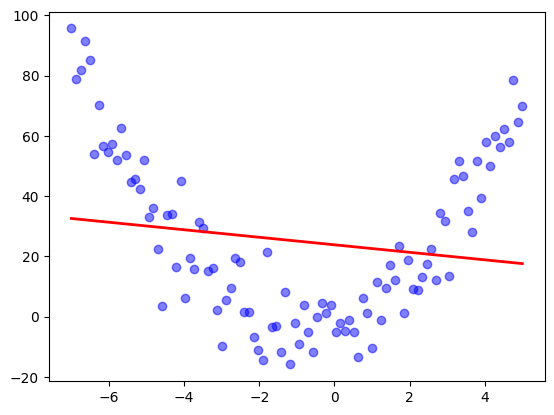

In [214]:

model_linear = LinearRegression()
model_linear.fit(x, y)
y_pred_linear = model_linear.predict(x)
plt.scatter(x, y, color="blue", alpha=0.5)
plt.plot(x, y_pred_linear, label="Линейная регрессия", color="red", linewidth=2)
plt.show()



###  Полиномиальная регрессия

Добавим дополнительный признак $x^2$, чтобы получить:


$$X = [x,x^2]$$

Теперь модель становится:

$$\hat{y} =  w_\text{0} + w_\text{1} x + w_\text{2} x^2 $$


📌 Это всё ещё **линейная модель по весам** \( w \),  
но она способна аппроксимировать **нелинейную зависимость** за счёт преобразованных признаков.
Добавим полиномиальные признаки в наш датасет и снова обучим модель


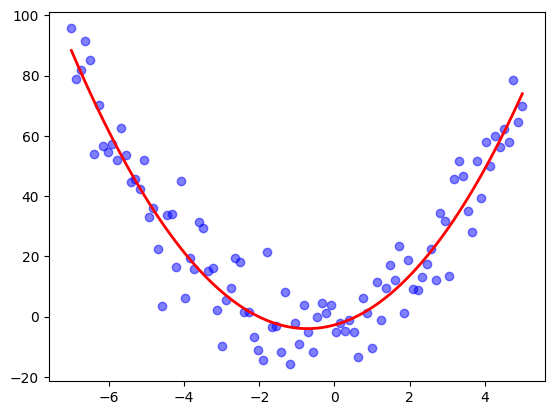

In [215]:
poly = PolynomialFeatures(degree=3, include_bias=False)
x_poly = poly.fit_transform(x)
model_poly = LinearRegression()
model_poly.fit(x_poly, y)
y_pred_poly = model_poly.predict(x_poly)
plt.scatter(x, y, color="blue", alpha=0.5)
plt.plot(x, y_pred_poly, label="Полиномиальная регрессия", color="red", linewidth=2)
plt.show()



### ✅ Вывод

> Чтобы линейная регрессия могла моделировать нелинейные зависимости, нужно **расширить признаки** (например, добавить \( x^2, x^3 \) и т.д.).  
> Это превращает исходную задачу в **линейную по параметрам**, но **нелинейную по исходным данным**.


## 2.Introduction — make all the preprocessing staff from the previous lesson.

### 2.1 Import libraries.


In [216]:
import pandas as pd
import numpy as np
import collections
import re
import warnings
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
warnings.filterwarnings('ignore')

### 2.2 Read Train and Test Parts.


In [217]:
df_train = pd.read_json('data/train.json')
df_test = pd.read_json('data/test.json')


### 2.3 Preprocess "Interest Level" feature.

In [218]:
low_train = df_train['price'].quantile(0.01)
high_train = df_train['price'].quantile(0.99)
low_test = df_test['price'].quantile(0.01)
high_test = df_test['price'].quantile(0.99)
df_train=df_train[(df_train['price']>low_train)&(df_train['price']<high_train)]
df_test=df_test[(df_test['price']>low_test)&(df_test['price']<high_test)]


df_train['interest_level']=df_train['interest_level'].map({'low':1,'medium':2,'high':3})


## 3. Intro data analysis part 2
### 3.1 Let's generate additional features for better model quality. Consider a column called "Features". It consists of a list of highlights of the current flat.

In [219]:
df_train['features']

4         [Dining Room, Pre-War, Laundry in Building, Di...
6         [Doorman, Elevator, Laundry in Building, Dishw...
9         [Doorman, Elevator, Laundry in Building, Laund...
10                                                       []
15        [Doorman, Elevator, Fitness Center, Laundry in...
                                ...                        
124000              [Elevator, Dishwasher, Hardwood Floors]
124002    [Common Outdoor Space, Cats Allowed, Dogs Allo...
124004    [Dining Room, Elevator, Pre-War, Laundry in Bu...
124008    [Pre-War, Laundry in Unit, Dishwasher, No Fee,...
124009    [Dining Room, Elevator, Laundry in Building, D...
Name: features, Length: 48343, dtype: object

### 3.2 Remove unused symbols ([,], ', ", and space) from the column.

In [220]:
df_train['features'] = df_train['features'].apply(lambda features: [re.sub(r"[\[\]\'\"\s]",'', feature) for feature in features ])
df_train['features']


4         [DiningRoom, Pre-War, LaundryinBuilding, Dishw...
6         [Doorman, Elevator, LaundryinBuilding, Dishwas...
9         [Doorman, Elevator, LaundryinBuilding, Laundry...
10                                                       []
15        [Doorman, Elevator, FitnessCenter, LaundryinBu...
                                ...                        
124000               [Elevator, Dishwasher, HardwoodFloors]
124002    [CommonOutdoorSpace, CatsAllowed, DogsAllowed,...
124004    [DiningRoom, Elevator, Pre-War, LaundryinBuild...
124008    [Pre-War, LaundryinUnit, Dishwasher, NoFee, Ou...
124009    [DiningRoom, Elevator, LaundryinBuilding, Dish...
Name: features, Length: 48343, dtype: object

### 3.3 Get all values in each list and collect the result in one huge list for the whole dataset. You can use DataFrame.iterrows().

In [221]:
feature_values = [l for lst in df_train['features'] for l in lst]


In [222]:
feature_values

['DiningRoom',
 'Pre-War',
 'LaundryinBuilding',
 'Dishwasher',
 'HardwoodFloors',
 'DogsAllowed',
 'CatsAllowed',
 'Doorman',
 'Elevator',
 'LaundryinBuilding',
 'Dishwasher',
 'HardwoodFloors',
 'NoFee',
 'Doorman',
 'Elevator',
 'LaundryinBuilding',
 'LaundryinUnit',
 'Dishwasher',
 'HardwoodFloors',
 'Doorman',
 'Elevator',
 'FitnessCenter',
 'LaundryinBuilding',
 'Doorman',
 'Elevator',
 'Loft',
 'Dishwasher',
 'HardwoodFloors',
 'NoFee',
 'Fireplace',
 'LaundryinUnit',
 'Dishwasher',
 'HardwoodFloors',
 'NoFee',
 'Elevator',
 'LaundryinBuilding',
 'Dishwasher',
 'HardwoodFloors',
 'NoFee',
 'HardwoodFloors',
 'CatsAllowed',
 'DogsAllowed',
 'Doorman',
 'Elevator',
 'LaundryinBuilding',
 'DogsAllowed',
 'CatsAllowed',
 'RoofDeck',
 'Doorman',
 'Elevator',
 'FitnessCenter',
 'Pre-War',
 'LaundryinBuilding',
 'HighSpeedInternet',
 'Dishwasher',
 'HardwoodFloors',
 'NoFee',
 'DogsAllowed',
 'CatsAllowed',
 'SwimmingPool',
 'RoofDeck',
 'Doorman',
 'Elevator',
 'FitnessCenter',
 'Laun

### 3.4 How many unique values does a result list contain?

In [223]:
len(set(feature_values))


1528

### 3.5 Let's get acquainted with the new library — Collections. With this package you could effectively get quantity statistics about your data.
### 3.6 Count the most popular functions from our huge list and take the top 20 for this moment.

In [224]:
count_features = collections.Counter(feature_values)
top20_features = [f[0] for f in count_features.most_common(20)]
top20_features

['Elevator',
 'HardwoodFloors',
 'CatsAllowed',
 'DogsAllowed',
 'Doorman',
 'Dishwasher',
 'NoFee',
 'LaundryinBuilding',
 'FitnessCenter',
 'Pre-War',
 'LaundryinUnit',
 'RoofDeck',
 'OutdoorSpace',
 'DiningRoom',
 'HighSpeedInternet',
 'Balcony',
 'SwimmingPool',
 'LaundryInBuilding',
 'NewConstruction',
 'Terrace']

### 3.8 Now create 20 new features based on the top 20 values: 1 if the value is in the "Feature" column, otherwise 0.

In [225]:
for feature_name in top20_features:
    df_train[feature_name] = df_train['features'].apply(lambda x: int(feature_name in x))
    df_test[feature_name] = df_test['features'].apply(lambda x: int(feature_name in x))

### Extend our feature set with 'bathrooms', 'bedrooms' and create a special variable feature_list with all feature names. Now we have 22 values. All models should be trained on these 22 features.

In [226]:
feature_list = top20_features + ['bathrooms'] + ['bedrooms']

In [227]:
feature_list

['Elevator',
 'HardwoodFloors',
 'CatsAllowed',
 'DogsAllowed',
 'Doorman',
 'Dishwasher',
 'NoFee',
 'LaundryinBuilding',
 'FitnessCenter',
 'Pre-War',
 'LaundryinUnit',
 'RoofDeck',
 'OutdoorSpace',
 'DiningRoom',
 'HighSpeedInternet',
 'Balcony',
 'SwimmingPool',
 'LaundryInBuilding',
 'NewConstruction',
 'Terrace',
 'bathrooms',
 'bedrooms']

## 4. Models implementation — Linear regression

### 4.1 Initialize the random number generator with a seed of 21.

In [228]:
np.random.seed(21)

### 4.2 Implement a Python class for a linear regression algorithm with two basic methods — fit and predict. Use stochastic gradient descent (SGD) to find optimal model weights. For better understanding, we recommend implementing separate versions of the algorithm with the analytical solution and non-stochastic gradient descent under the hood.

In [229]:
class LinearRegressionSGD:
    def __init__(self, learning_rate=0.01, n_epochs=100):
        self.learning_rate = learning_rate
        self.epochs=n_epochs
 
    def fit(self,X,y):
        X_bias = np.hstack([np.ones((X.shape[0],1)),X])
        self.weights = np.zeros(X_bias.shape[1])
        y = np.array(y)
        for epoch in range(self.epochs):
            idx = np.random.permutation(X.shape[0])
            X_shuffled = X_bias[idx]
            y_shuffled = y[idx]
            for xi, yi in zip(X_shuffled,y_shuffled):
                y_pred = xi @ self.weights
                error = y_pred-yi
                grad = error*xi
                self.weights -= self.learning_rate*grad
    def predict(self,X):
        X_bias = np.hstack([np.ones((X.shape[0],1)),X])
        return X_bias@self.weights




        

In [230]:
class LinearRegressionAnalytical:
    def fit(self,X,y):
        X_bias = np.hstack([np.ones((X.shape[0],1)),X])
        y=np.array(y)
        self.weights = np.linalg.inv(X_bias.T@X_bias)@X_bias.T@y
    def predict(self,X):
        X_bias = np.hstack([np.ones((X.shape[0],1)),X])
        return X_bias@self.weights

In [231]:
class LinearRegressionNSGD:
    def __init__(self,learning_rate=0.001,n_epochs=5000):
        self.learning_rate=learning_rate
        self.epochs=n_epochs
    def fit(self,X,y):
        X_bias = np.hstack([np.ones((X.shape[0],1)),X])
        self.weights = np.zeros(X_bias.shape[1])
        y = np.array(y)
        for _ in range(self.epochs):
            y_pred = X_bias @ self.weights
            error = y_pred - y
            grad = 2 * X_bias.T @ error
            self.weights -=self.learning_rate*grad
    def predict(self,X):
        X_bias = np.hstack([np.ones((X.shape[0],1)),X])
        return X_bias@self.weights
        
    

In [232]:
class LinearRegressionMiniBatch:
    def __init__(self, learning_rate=0.01, n_epochs=100, batch_size=128, random_state=21):
        self.learning_rate = learning_rate
        self.epochs = n_epochs
        self.batch_size = batch_size
        self.random_state = random_state

    def fit(self, X, y):
        np.random.seed(self.random_state)
        X_bias = np.hstack([np.ones((X.shape[0], 1)), X])
        self.weights = np.zeros(X_bias.shape[1])
        y = np.array(y)

        for epoch in range(self.epochs):
            indices = np.random.permutation(X.shape[0])
            X_shuffled = X_bias[indices]
            y_shuffled = y[indices]
            for start in range(0, X.shape[0], self.batch_size):
                end = start + self.batch_size
                X_batch = X_shuffled[start:end]
                y_batch = y_shuffled[start:end]

                y_pred = X_batch @ self.weights
                error = y_pred - y_batch
                grad = 2 * X_batch.T @ error / len(y_batch)
                self.weights -= self.learning_rate * grad

    def predict(self, X):
        X_bias = np.hstack([np.ones((X.shape[0], 1)), X])
        return X_bias @ self.weights


### 4.3 What is determenistic model? Make SGD determenistic.
Детерминированная модель - это модель, которая при одинаковом входе всегда даёт одинаковый результат.
Она не зависит от случайности, то есть результат не меняется от запуска к запуску.
В данный момент **LinearRegressionSGD** выдает разные результаты. Чтобы модель стала детерминированной нужно инициализировать сид внутри метода **fit()**

In [233]:
class LinearRegressionSGD:
    def __init__(self, learning_rate=0.01, n_epochs=100,random_state=21):
        self.learning_rate = learning_rate
        self.epochs=n_epochs
        self.random_state = random_state
    def fit(self,X,y):
        X_bias = np.hstack([np.ones((X.shape[0],1)),X])
        self.weights = np.zeros(X_bias.shape[1])
        y = np.array(y)
        np.random.seed(self.random_state)
        for epoch in range(self.epochs):
            np.random.seed(self.random_state)
            idx = np.random.permutation(X.shape[0])
            X_shuffled = X_bias[idx]
            y_shuffled = y[idx]
            for xi, yi in zip(X_shuffled,y_shuffled):
                y_pred = xi @ self.weights
                error = y_pred-yi
                grad = error*xi
                self.weights -= self.learning_rate*grad
    def predict(self,X):
        X_bias = np.hstack([np.ones((X.shape[0],1)),X])
        return X_bias@self.weights




        

**Определение R² (коэффициента детерминации):**

$$
R^2 = 1 - \frac{RSS}{TSS}
$$

где:

- $RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$ — сумма квадратов ошибок (residual sum of squares) , где $y_i$ истиное значение, $\hat{y}_i$ - предсказанное
- $TSS = \sum_{i=1}^{n} (y_i - \bar{y})^2$ — общая сумма квадратов (total sum of squares),где $\bar{y}$ — среднее значение $y$



In [234]:
def calc_r2(y_true, y_pred):
    rss = np.sum((y_true - y_pred)**2)
    tss = np.sum((y_true - np.mean(y_true))**2)
    return 1 - rss / tss


### 4.5 Make predictions with your algorithm and estimate the model with MAE, RMSE and R2 metrics.

#### 4.6 Initialize **LinearRegression()** from sklearn.linear_model, fit the model, and predict the training and test parts as in the previous lesson.

In [235]:

X_train = df_train[[f for f in feature_list]]
y_train = df_train['price']
X_test = df_test[[f for f in feature_list]]
y_test = df_test['price']


In [236]:
modelsgd = LinearRegressionSGD()
modelsgd.fit(X_train,y_train)
y_pred_sgd_test = modelsgd.predict(X_test)
y_pred_sgd_train = modelsgd.predict(X_train)


In [237]:
modelnsgd = LinearRegressionNSGD(learning_rate=1e-7,n_epochs=500)
modelnsgd.fit(X_train,y_train)
y_pred_nsgd_test = modelnsgd.predict(X_test)
y_pred_nsgd_train = modelnsgd.predict(X_train)


In [238]:
model_analitycal = LinearRegressionAnalytical()
model_analitycal.fit(X_train,y_train)
y_pred_analytical_test = model_analitycal.predict(X_test)
y_pred_analytical_train = model_analitycal.predict(X_train)


In [239]:
model_minibatch = LinearRegressionMiniBatch()
model_minibatch.fit(X_train,y_train)
y_pred_minibatch_test = model_minibatch.predict(X_test)
y_pred_minibatch_train = model_minibatch.predict(X_train)

In [240]:
sklearn_model = LinearRegression(fit_intercept=True)
sklearn_model.fit(X_train,y_train)
y_pred_sklearn_test = sklearn_model.predict(X_test)
y_pred_sklearn_train = sklearn_model.predict(X_train)


#### 4.7 Compare the quality metrics and make sure the difference is small (between your implementations and sklearn).
#### 4.8 Store the metrics as in the previous lesson in a table with columns model, train, test for MAE table, RMSE table, and R2 coefficient.

In [241]:
result_MAE = pd.DataFrame(columns=['model','train','test'])
result_RMSE = pd.DataFrame(columns=['model','train','test'])
result_R2=pd.DataFrame(columns=['model','train','test'])

In [242]:
def add_metrics(model_name,y_true_train,y_true_test,y_pred_train,y_pred_test):
    rmse_train = round(float(np.sqrt(mean_squared_error(y_true_train,y_pred_train))),4)
    mae_train = round(float(mean_absolute_error(y_true_train,y_pred_train)),4)
    r2_train = round(float(calc_r2(y_true_train,y_pred_train)),4)
    rmse_test = round(float(np.sqrt(mean_squared_error(y_true_test,y_pred_test))),4)
    mae_test = round(float(mean_absolute_error(y_true_test,y_pred_test)),4)
    r2_test = round(float(calc_r2(y_true_test,y_pred_test)),4)
    print(f"{model_name}\nRMSE test: {rmse_test},RMSE train: {rmse_train},\n MAE test: {mae_test},MAE train: {mae_train}\n R2  test: {r2_test}, R2 train: {r2_train}")
    result_RMSE.loc[len(result_RMSE)]= {'model':model_name,'train':rmse_train,'test':rmse_test} 
    result_MAE.loc[len(result_MAE)] = {'model':model_name,'train':mae_train,'test':mae_test}
    result_R2.loc[len(result_MAE)] = {'model':model_name,'train':r2_train,'test':r2_test}

In [243]:
add_metrics('LinRegSGD',y_train,y_test,y_pred_sgd_train,y_pred_sgd_test)
add_metrics('LinRegNSGD',y_train,y_test,y_pred_nsgd_train,y_pred_nsgd_test)
add_metrics('LinRegAnalycital',y_train,y_test,y_pred_analytical_train,y_pred_analytical_test)
add_metrics('LinRegMinibatch',y_train,y_test,y_pred_minibatch_train,y_pred_minibatch_test)
add_metrics('SklearnLinReg',y_train,y_test,y_pred_sklearn_train,y_pred_sklearn_test)

LinRegSGD
RMSE test: 1223.477,RMSE train: 1051.1348,
 MAE test: 727.7236,MAE train: 705.5587
 R2  test: 0.3952, R2 train: 0.5605
LinRegNSGD
RMSE test: 1190.9054,RMSE train: 1057.274,
 MAE test: 732.137,MAE train: 726.5598
 R2  test: 0.427, R2 train: 0.5554
LinRegAnalycital
RMSE test: 1243.0662,RMSE train: 1027.2629,
 MAE test: 759.3623,MAE train: 708.7371
 R2  test: 0.3757, R2 train: 0.5803
LinRegMinibatch
RMSE test: 1240.7422,RMSE train: 1027.5168,
 MAE test: 755.7561,MAE train: 706.1911
 R2  test: 0.378, R2 train: 0.5801
SklearnLinReg
RMSE test: 1243.0662,RMSE train: 1027.2629,
 MAE test: 759.3623,MAE train: 708.7371
 R2  test: 0.3757, R2 train: 0.5803


In [244]:
result_MAE

,model,train,test
0,LinRegSGD,705.5587,727.7236
1,LinRegNSGD,726.5598,732.1370
2,LinRegAnalycital,708.7371,759.3623
3,LinRegMinibatch,706.1911,755.7561
4,SklearnLinReg,708.7371,759.3623


In [245]:
result_RMSE

,model,train,test
0,LinRegSGD,1051.1348,1223.4770
1,LinRegNSGD,1057.2740,1190.9054
2,LinRegAnalycital,1027.2629,1243.0662
3,LinRegMinibatch,1027.5168,1240.7422
4,SklearnLinReg,1027.2629,1243.0662


In [246]:
result_R2

,model,train,test
1,LinRegSGD,0.5605,0.3952
2,LinRegNSGD,0.5554,0.4270
3,LinRegAnalycital,0.5803,0.3757
4,LinRegMinibatch,0.5801,0.3780
5,SklearnLinReg,0.5803,0.3757


### 5 Regularized models implementation — Ridge, Lasso, ElasticNet

#### 5.1 Implement Ridge, Lasso, ElasticNet algorithms: extend the loss function with L2, L1 and both regularizations accordingly.

In [247]:
class RidgeLinearRegressionSGD:
    def __init__(self, learning_rate=0.01, n_epochs=100, random_state=21,alpha=1):
        self.learning_rate = learning_rate
        self.epochs=n_epochs
        self.random_state=random_state
        self.alpha=alpha
    def fit(self,X,y):
        X_bias = np.hstack([np.ones((X.shape[0],1)),X])
        self.weights = np.zeros(X_bias.shape[1])
        y = np.array(y)
        np.random.seed(self.random_state)
        for epoch in range(self.epochs):
            idx = np.random.permutation(X.shape[0])
            X_shuffled = X_bias[idx]
            y_shuffled = y[idx]
            for xi, yi in zip(X_shuffled,y_shuffled):
                y_pred = xi @ self.weights
                error = y_pred-yi
                rad = 2*self.alpha*self.weights
                rad[0]=0
                grad = error*xi + rad
                self.weights -= self.learning_rate*grad
    def predict(self,X):
        X_bias = np.hstack([np.ones((X.shape[0],1)),X])
        return X_bias@self.weights




        

In [248]:
class LassoLinearRegression():
    def __init__(self, alpha=0.1, n_epochs=100):
        self.alpha = alpha
        self.epochs = n_epochs
    def _soft_threshold(self,rho,alpha):
        if rho<-alpha:
            return rho+alpha
        if rho>alpha:
            return rho-alpha
        else: return 0
    def fit(self,X,y):
        X = np.array(X)
        y = np.array(y)
        X = np.hstack([np.ones((X.shape[0],1)),X])
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        for _ in range(self.epochs):
            for j in range(n_features):
                y_pred = X @ self.weights
                y_pred_minus_j = y_pred - X[:,j]*self.weights[j]
                residual = y - y_pred_minus_j
                rho_j = residual@X[:,j]
                if j == 0:
                    self.weights[j] = rho_j/(X[:,j]@X[:,j])
                else: self.weights[j] = self._soft_threshold(rho_j,self.alpha)/(X[:,j]@X[:,j])
    def predict(self,X):
        X = np.array(X)
        X = np.hstack([np.ones((X.shape[0],1)),X])
        return X@self.weights
    

In [249]:
class ElasticNetLinearRegression:
    def __init__(self,alpha=1,l1_ratio = 0.5,n_epochs=100):
        self.l1=l1_ratio*alpha
        self.l2=(1-l1_ratio)*alpha
        self.epochs = n_epochs
    def _soft_threshold(self,l1,rho):
        if rho<-l1:
            return rho+l1
        elif rho>l1:
            return rho-l1
        else:return 0
    def fit(self,X,y):
        X=np.array(X)
        y=np.array(y)
        X = np.hstack([np.ones((X.shape[0],1)),X])
        n_features =X.shape[1]
        self.weights=np.zeros(n_features)
        for _ in range(self.epochs):
            for j in range(n_features):
                y_pred = X@self.weights
                y_pred_minus_j = y_pred - X[:,j]*self.weights[j]
                residual = y - y_pred_minus_j
                rho_j = residual@X[:,j]
                if j == 0:
                    self.weights[j]=rho_j/(X[:,j]@X[:,j])
                else: self.weights[j]=self._soft_threshold(self.l1,rho_j)/(X[:,j]@X[:,j]+self.l2)
    def predict(self,X):
        X = np.array(X)
        X = np.hstack([np.ones((X.shape[0],1)),X])
        return X@self.weights
    



#### 5.2 Make predictions with your algorithm and estimate the model with MAE, RMSE and R2 metrics.

In [250]:
modelridge = RidgeLinearRegressionSGD(alpha=0.05,n_epochs=100)
modelridge.fit(X_train,y_train)
y_pred_ridge_test = modelridge.predict(X_test)
y_pred_ridge_train = modelridge.predict(X_train)


In [251]:
modellasso = LassoLinearRegression(alpha=5900000,n_epochs=1000)
modellasso.fit(X_train,y_train)
y_pred_lasso_test = modellasso.predict(X_test)
y_pred_lasso_train = modellasso.predict(X_train)


In [252]:
modelelasticnet = ElasticNetLinearRegression(alpha=7300,l1_ratio=0.15)
modelelasticnet.fit(X_train,y_train)
y_pred_elasticnet_test = modelelasticnet.predict(X_test)
y_pred_elasticnet_train = modelelasticnet.predict(X_train)



In [253]:
add_metrics('Ridge default',y_train,y_test,y_pred_ridge_train,y_pred_ridge_test)
add_metrics('Lasso default',y_train,y_test,y_pred_lasso_train,y_pred_lasso_test)
add_metrics('ElasticNet default',y_train,y_test,y_pred_elasticnet_train,y_pred_elasticnet_test)

Ridge default
RMSE test: 1181.0081,RMSE train: 1089.5299,
 MAE test: 734.1061,MAE train: 715.6692
 R2  test: 0.4365, R2 train: 0.5278
Lasso default
RMSE test: 1203.4707,RMSE train: 1110.9555,
 MAE test: 769.454,MAE train: 765.8958
 R2  test: 0.4148, R2 train: 0.5091
ElasticNet default
RMSE test: 1163.725,RMSE train: 1074.6945,
 MAE test: 748.6607,MAE train: 732.7325
 R2  test: 0.4528, R2 train: 0.5406


#### 5.3 Initialize Ridge(), Lasso(), and ElasticNet() from sklearn.linear_model, fit the model, and make predictions for the training and test samples as in the previous lesson.

In [254]:
sklearn_modelridge = Ridge(alpha=0.05)
sklearn_modelridge.fit(X_train,y_train)
y_pred_sklearn_ridge_test = sklearn_modelridge.predict(X_test)
y_pred_sklearn_ridge_train = sklearn_modelridge.predict(X_train)

In [255]:
sklearn_modellasso = Lasso(alpha=0.8)
sklearn_modellasso.fit(X_train,y_train)
y_pred_sklearn_lasso_test = sklearn_modellasso.predict(X_test)
y_pred_sklearn_lasso_train = sklearn_modellasso.predict(X_train)


In [256]:
sklearn_modelelasticnet = ElasticNet(alpha=0.2,l1_ratio=0.3)
sklearn_modelelasticnet.fit(X_train,y_train)
y_pred_sklearn_elasticnet_test = sklearn_modelelasticnet.predict(X_test)
y_pred_sklearn_elasticnet_train = sklearn_modelelasticnet.predict(X_train)



In [257]:
add_metrics('Sklearn Ridge default',y_train,y_test,y_pred_sklearn_ridge_train,y_pred_sklearn_ridge_test)
add_metrics('Sklearn Lasso default',y_train,y_test,y_pred_sklearn_lasso_train,y_pred_sklearn_lasso_test)
add_metrics('Sklearn Elastic default',y_train,y_test,y_pred_sklearn_elasticnet_train,y_pred_sklearn_elasticnet_test)

Sklearn Ridge default
RMSE test: 1243.0639,RMSE train: 1027.2629,
 MAE test: 759.3616,MAE train: 708.737
 R2  test: 0.3757, R2 train: 0.5803
Sklearn Lasso default
RMSE test: 1241.9361,RMSE train: 1027.39,
 MAE test: 756.7949,MAE train: 708.4184
 R2  test: 0.3768, R2 train: 0.5802
Sklearn Elastic default
RMSE test: 1163.9849,RMSE train: 1079.4163,
 MAE test: 750.1923,MAE train: 735.5678
 R2  test: 0.4526, R2 train: 0.5366


#### 5.5 Store the metrics as in the previous lesson in a table with columns model, train, test for MAE table, RMSE table, and R2 coefficient.

In [258]:
result_RMSE

,model,train,test
0,LinRegSGD,1051.1348,1223.4770
1,LinRegNSGD,1057.2740,1190.9054
2,LinRegAnalycital,1027.2629,1243.0662
3,LinRegMinibatch,1027.5168,1240.7422
4,SklearnLinReg,1027.2629,1243.0662
5,Ridge default,1089.5299,1181.0081
6,Lasso default,1110.9555,1203.4707
7,ElasticNet default,1074.6945,1163.7250
8,Sklearn Ridge default,1027.2629,1243.0639
9,Sklearn Lasso default,1027.3900,1241.9361


In [259]:
result_MAE

,model,train,test
0,LinRegSGD,705.5587,727.7236
1,LinRegNSGD,726.5598,732.1370
2,LinRegAnalycital,708.7371,759.3623
3,LinRegMinibatch,706.1911,755.7561
4,SklearnLinReg,708.7371,759.3623
5,Ridge default,715.6692,734.1061
6,Lasso default,765.8958,769.4540
7,ElasticNet default,732.7325,748.6607
8,Sklearn Ridge default,708.7370,759.3616
9,Sklearn Lasso default,708.4184,756.7949


In [260]:
result_R2

,model,train,test
1,LinRegSGD,0.5605,0.3952
2,LinRegNSGD,0.5554,0.4270
3,LinRegAnalycital,0.5803,0.3757
4,LinRegMinibatch,0.5801,0.3780
5,SklearnLinReg,0.5803,0.3757
6,Ridge default,0.5278,0.4365
7,Lasso default,0.5091,0.4148
8,ElasticNet default,0.5406,0.4528
9,Sklearn Ridge default,0.5803,0.3757
10,Sklearn Lasso default,0.5802,0.3768


## 6.Feature normalization

### 6.1 First, write several examples of why and where feature normalization is mandatory and vice versa.

#### 1. Линейная регрессия и логистическая регрессия
Чтобы веса были сопоставимы и правильно работала регуляризация.

#### 2. Модели с регуляризацией
(Lasso, Ridge, ElasticNet)

Регуляризация штрафует за размер весов.

Если признаки имеют разные масштабы, штраф работает неадекватно.


#### 3. Методы, основанные на расстояниях
(kNN, KMeans, DBSCAN)

Зачем: расстояния между точками чувствительны к масштабу.

Без нормализации: признаки с большим разбросом полностью доминируют.

### 6.2 Let's consider the first of the classical normalization methods — MinMaxScaler. Write a mathematical formula for this method.

## $$\frac{X-X_{min}}{X_{max}-X_{min}}$$


### 6.3 Implement your own function or class for MinMaxScaler feature normalization.

In [261]:
class MinMaxScaler21:
    def __init__(self, low=0, high=1):
        self.low = low
        self.high = high

    def fit(self, X):
        self.column_names = X.columns if hasattr(X, "columns") else None
        X = np.array(X)
        self.X_maxs = X.max(axis=0)
        self.X_mins = X.min(axis=0)

    def transform(self, X):
        X = np.array(X)
        scaled = self.low + (X - self.X_mins) / (self.X_maxs - self.X_mins) * (self.high - self.low)
        if self.column_names is not None:
            return pd.DataFrame(scaled, columns=self.column_names)
        else:
            return scaled

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [262]:
mms_scaler21 = MinMaxScaler21()
mms_scaler21.fit(X_train)
X_mms_scaled21_test = mms_scaler21.transform(X_test)
X_mms_scaled21_train = mms_scaler21.transform(X_train)

#### Initialize **MinMaxScaler()** from sklearn.preprocessing.

In [263]:
mms_scaler = MinMaxScaler()
mms_scaler.fit(X_train)
X_mms_scaled_test = mms_scaler.transform(X_test)
X_mms_scaled_train = mms_scaler.transform(X_train)


#### 6.5 Compare the feature normalization with your own method and with sklearn.

In [264]:
np.allclose(X_mms_scaled21_test, X_mms_scaled_test)


True

#### 6.6 Repeat the steps from b to e for another normalization method StandardScaler.

In [265]:
class StandardScaler21():
    def fit(self,X):
        self.columns_name  = X.columns if hasattr(X,'columns') else None
        X=np.array(X)
        self.x_mean = X.mean(axis=0)
        self.x_std=X.std(axis=0,ddof=0)
    def transform(self,X):
        X=np.array(X)
        scaled= (X-self.x_mean)/self.x_std
        if self.columns_name is not None:
            return pd.DataFrame(scaled,columns=self.columns_name)
        else:
            return scaled
    def fit_transform(self,X):
        self.fit(X)
        return self.transform(X)

In [266]:
std_scaler21 = StandardScaler21()
std_scaler21.fit(X_train)
X_std_scaled21_test = std_scaler21.transform(X_test)
X_std_scaled21_train = std_scaler21.transform(X_train)


In [267]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_std_scaled_test = std_scaler.transform(X_test)


In [268]:
np.allclose(X_std_scaled21_test,X_std_scaled_test)

True

### 7.Fit custom and sklearn models with normalized data

#### 7.1 Fit all models — Linear Regression, Ridge, Lasso, and ElasticNet — with MinMaxScaler.

In [269]:
sklearn_models = [LinearRegression(),Ridge(alpha=0.01),Lasso(alpha=0.1),ElasticNet(alpha=0.2,l1_ratio=0.3)]
custom_models = [LinearRegressionSGD(),RidgeLinearRegressionSGD(alpha=0.001),LassoLinearRegression(alpha=850000),
                 ElasticNetLinearRegression(alpha=0.1,l1_ratio=0.3)]
sklearn_models_names = ['Sklearn LinReg MinMaxScaler','Sklearn Ridge MinMaxScaler',
                        'Sklearn Lasso MinMaxScaler', 'Sklearn ElasticNet MinMaxScaler']
custom_models_names = ['LinReg MinMaxScaler','Ridge MinMaxScaler',
                        'Lasso MinMaxScaler', 'ElasticNet MinMaxScaler']
for sklearn, custom,sklearn_models_name,custom_models_name in zip(sklearn_models,custom_models,sklearn_models_names,custom_models_names):
    sklearn_model = sklearn
    custom_model = custom
    sklearn_model.fit(X_mms_scaled21_train,y_train)
    y_pred_sklearn_train = sklearn_model.predict(X_mms_scaled21_train)
    y_pred_sklearn_test = sklearn_model.predict(X_mms_scaled21_test)
    add_metrics(f'{sklearn_models_name}',y_train,y_test,y_pred_sklearn_train,y_pred_sklearn_test)
    custom_model.fit(X_mms_scaled21_train,y_train)
    y_pred_custom_train = custom_model.predict(X_mms_scaled21_train)
    y_pred_custom_test = custom_model.predict(X_mms_scaled21_test)
    add_metrics(f'{custom_models_name}',y_train,y_test,y_pred_custom_train,y_pred_custom_test)

Sklearn LinReg MinMaxScaler
RMSE test: 1243.0662,RMSE train: 1027.2629,
 MAE test: 759.3623,MAE train: 708.7371
 R2  test: 0.3757, R2 train: 0.5803
LinReg MinMaxScaler
RMSE test: 1239.2571,RMSE train: 1035.7811,
 MAE test: 743.8682,MAE train: 707.7252
 R2  test: 0.3795, R2 train: 0.5733
Sklearn Ridge MinMaxScaler
RMSE test: 1243.0193,RMSE train: 1027.2629,
 MAE test: 759.3631,MAE train: 708.7377
 R2  test: 0.3757, R2 train: 0.5803
Ridge MinMaxScaler
RMSE test: 1148.6591,RMSE train: 1093.5648,
 MAE test: 776.0012,MAE train: 736.2762
 R2  test: 0.4669, R2 train: 0.5243
Sklearn Lasso MinMaxScaler
RMSE test: 1241.7669,RMSE train: 1027.2672,
 MAE test: 759.0541,MAE train: 708.6999
 R2  test: 0.377, R2 train: 0.5803
Lasso MinMaxScaler
RMSE test: 1162.7474,RMSE train: 1112.9781,
 MAE test: 768.8633,MAE train: 759.2427
 R2  test: 0.4537, R2 train: 0.5073
Sklearn ElasticNet MinMaxScaler
RMSE test: 1448.8733,RMSE train: 1408.5255,
 MAE test: 990.0984,MAE train: 993.2661
 R2  test: 0.1518, R2 tra

#### 7.2 Fit all models — Linear Regression, Ridge, Lasso, and ElasticNet — with StandartScaler.

In [270]:
sklearn_models = [LinearRegression(),Ridge(alpha=0.01),Lasso(alpha=0.1),ElasticNet(alpha=0.2,l1_ratio=0.3)]
custom_models = [LinearRegressionSGD(),RidgeLinearRegressionSGD(alpha=0.3,learning_rate=0.00001,n_epochs=300),LassoLinearRegression(alpha=0.1),
                 ElasticNetLinearRegression(alpha=0.2,l1_ratio=0.3)]
sklearn_models_names = ['Sklearn LinReg StandardScaler','Sklearn Ridge StandardScaler',
                        'Sklearn Lasso StandardScaler', 'Sklearn ElasticNet StandardScaler']
custom_models_names = ['LinReg StandardScaler','Ridge StandardScaler',
                        'Lasso StandardScaler', 'ElasticNet StandardScaler']
for sklearn, custom,sklearn_models_name,custom_models_name in zip(sklearn_models,custom_models,sklearn_models_names,custom_models_names):
    sklearn_model = sklearn
    custom_model = custom
    sklearn_model.fit(X_std_scaled21_train,y_train)
    y_pred_sklearn_train = sklearn_model.predict(X_std_scaled21_train)
    y_pred_sklearn_test = sklearn_model.predict(X_std_scaled21_test)
    add_metrics(f'{sklearn_models_name}',y_train,y_test,y_pred_sklearn_train,y_pred_sklearn_test)
    custom_model.fit(X_std_scaled21_train,y_train)
    y_pred_custom_train = custom_model.predict(X_std_scaled21_train)
    y_pred_custom_test = custom_model.predict(X_std_scaled21_test)
    add_metrics(f'{custom_models_name}',y_train,y_test,y_pred_custom_train,y_pred_custom_test)

Sklearn LinReg StandardScaler
RMSE test: 1243.0662,RMSE train: 1027.2629,
 MAE test: 759.3623,MAE train: 708.7371
 R2  test: 0.3757, R2 train: 0.5803
LinReg StandardScaler
RMSE test: 1170.0947,RMSE train: 1119.9745,
 MAE test: 746.8096,MAE train: 786.2776
 R2  test: 0.4468, R2 train: 0.5011
Sklearn Ridge StandardScaler
RMSE test: 1243.0661,RMSE train: 1027.2629,
 MAE test: 759.3623,MAE train: 708.7371
 R2  test: 0.3757, R2 train: 0.5803
Ridge StandardScaler
RMSE test: 1198.4564,RMSE train: 1083.8213,
 MAE test: 761.7864,MAE train: 747.9892
 R2  test: 0.4197, R2 train: 0.5328
Sklearn Lasso StandardScaler
RMSE test: 1243.0051,RMSE train: 1027.2632,
 MAE test: 759.2021,MAE train: 708.7164
 R2  test: 0.3757, R2 train: 0.5803
Lasso StandardScaler
RMSE test: 1243.0662,RMSE train: 1027.2629,
 MAE test: 759.3623,MAE train: 708.7371
 R2  test: 0.3757, R2 train: 0.5803
Sklearn ElasticNet StandardScaler
RMSE test: 1211.0609,RMSE train: 1033.2611,
 MAE test: 746.5211,MAE train: 711.0028
 R2  test:

#### 7.3 Add all results to our dataframe with metrics on samples.

In [271]:
result_RMSE.iloc[10:]

,model,train,test
10,Sklearn Elastic default,1079.4163,1163.9849
11,Sklearn LinReg MinMaxScaler,1027.2629,1243.0662
12,LinReg MinMaxScaler,1035.7811,1239.2571
13,Sklearn Ridge MinMaxScaler,1027.2629,1243.0193
14,Ridge MinMaxScaler,1093.5648,1148.6591
15,Sklearn Lasso MinMaxScaler,1027.2672,1241.7669
16,Lasso MinMaxScaler,1112.9781,1162.7474
17,Sklearn ElasticNet MinMaxScaler,1408.5255,1448.8733
18,ElasticNet MinMaxScaler,1027.2630,1242.7392
19,Sklearn LinReg StandardScaler,1027.2629,1243.0662


In [272]:
result_MAE.iloc[10:]

,model,train,test
10,Sklearn Elastic default,735.5678,750.1923
11,Sklearn LinReg MinMaxScaler,708.7371,759.3623
12,LinReg MinMaxScaler,707.7252,743.8682
13,Sklearn Ridge MinMaxScaler,708.7377,759.3631
14,Ridge MinMaxScaler,736.2762,776.0012
15,Sklearn Lasso MinMaxScaler,708.6999,759.0541
16,Lasso MinMaxScaler,759.2427,768.8633
17,Sklearn ElasticNet MinMaxScaler,993.2661,990.0984
18,ElasticNet MinMaxScaler,708.7416,759.3653
19,Sklearn LinReg StandardScaler,708.7371,759.3623


In [273]:
result_R2.iloc[10:]

,model,train,test
11,Sklearn Elastic default,0.5366,0.4526
12,Sklearn LinReg MinMaxScaler,0.5803,0.3757
13,LinReg MinMaxScaler,0.5733,0.3795
14,Sklearn Ridge MinMaxScaler,0.5803,0.3757
15,Ridge MinMaxScaler,0.5243,0.4669
16,Sklearn Lasso MinMaxScaler,0.5803,0.3770
17,Lasso MinMaxScaler,0.5073,0.4537
18,Sklearn ElasticNet MinMaxScaler,0.2109,0.1518
19,ElasticNet MinMaxScaler,0.5803,0.3760
20,Sklearn LinReg StandardScaler,0.5803,0.3757


### 8. Overfit models

#### 8.1 Let's look at an overfitted model in practice. From theory, you know that polynomial regression is easy to overfit. So let's create a toy example and see how regularization works in real life.
#### 8.2 In the previous lesson, we created polynomial features with degree 10. Here we repeat these steps from the previous lesson, remembering that we have only 3 basic features — 'bathrooms', 'bedrooms', 'interest_level'.

#### 8.3 And train and fit all our implemented algorithms — Linear Regression, Ridge, Lasso, and ElasticNet — on a set of polynomial features.

#### 8.4 Store the results of the quality metrics in the result dataframe.

In [274]:
custom_models = [LinearRegressionSGD(),RidgeLinearRegressionSGD(alpha=1),LassoLinearRegression(alpha=1),
                 ElasticNetLinearRegression(alpha=1,l1_ratio=0.5)]
custom_models_names_poly = ['LinReg Polynomial','Ridge Polynomial',
                        'Lasso Polynomial', 'ElasticNet Polynomial']
poly = make_pipeline(MinMaxScaler(),PolynomialFeatures(degree=10))
poly_x_train = poly.fit_transform(X_train[['bathrooms','bedrooms']])
poly_x_test = poly.transform(X_test[['bathrooms','bedrooms']])
for model, model_name in zip(custom_models,custom_models_names_poly):
    custom_model = model
    custom_model.fit(poly_x_train,y_train)
    y_pred_poly_train = custom_model.predict(poly_x_train)

    y_pred_poly_test = custom_model.predict(poly_x_test)

    add_metrics(f'{model_name}',y_train,y_test,y_pred_poly_train,y_pred_poly_test)

LinReg Polynomial
RMSE test: 550151408677.3514,RMSE train: 1104.5121,
 MAE test: 2034392103.3065,MAE train: 776.9576
 R2  test: -1.2228843389719773e+17, R2 train: 0.5148
Ridge Polynomial
RMSE test: 31417.0769,RMSE train: 1585.8362,
 MAE test: 1213.0114,MAE train: 1100.3632
 R2  test: -397.7975, R2 train: -0.0003
Lasso Polynomial
RMSE test: 1971126788630.7012,RMSE train: 1090.6891,
 MAE test: 7288981885.5784,MAE train: 764.8318
 R2  test: -1.5698206768373092e+18, R2 train: 0.5268
ElasticNet Polynomial
RMSE test: 620279620074.0933,RMSE train: 1101.5246,
 MAE test: 2293717484.6326,MAE train: 773.1852
 R2  test: -1.5545186936487462e+17, R2 train: 0.5174


In [275]:
result_RMSE.iloc[26:]

,model,train,test
26,ElasticNet StandardScaler,1027.2629,1.243065e+03
27,LinReg Polynomial,1104.5121,5.501514e+11
28,Ridge Polynomial,1585.8362,3.141708e+04
29,Lasso Polynomial,1090.6891,1.971127e+12
30,ElasticNet Polynomial,1101.5246,6.202796e+11


In [276]:
result_MAE.iloc[26:]

,model,train,test
26,ElasticNet StandardScaler,708.7370,7.593618e+02
27,LinReg Polynomial,776.9576,2.034392e+09
28,Ridge Polynomial,1100.3632,1.213011e+03
29,Lasso Polynomial,764.8318,7.288982e+09
30,ElasticNet Polynomial,773.1852,2.293717e+09


In [277]:
result_R2.iloc[26:]

,model,train,test
27,ElasticNet StandardScaler,0.5803,3.757000e-01
28,LinReg Polynomial,0.5148,-1.222884e+17
29,Ridge Polynomial,-0.0003,-3.977975e+02
30,Lasso Polynomial,0.5268,-1.569821e+18
31,ElasticNet Polynomial,0.5174,-1.554519e+17


#### 8.6 Additionally try different alpha parameters of regularization in algorithms, choose the best one and analyze results.

In [ ]:
custom_models = [RidgeLinearRegressionSGD(alpha=1000 ,learning_rate=0.0000001,n_epochs=1000),LassoLinearRegression(alpha=845000,n_epochs=300),
                 ElasticNetLinearRegression(alpha=845000,l1_ratio=1,n_epochs=300)]
custom_models_names_poly = ['Ridge Polynomial=700000',
                        'Lasso Polynomial l1 = 860000', 'ElasticNet Polynomial - 845000, l1_ratio - 1']
poly = make_pipeline(MinMaxScaler(),PolynomialFeatures(degree=10))
poly_x_train = poly.fit_transform(X_train[['bathrooms','bedrooms']])
poly_x_test = poly.transform(X_test[['bathrooms','bedrooms']])
for model, model_name in zip(custom_models,custom_models_names_poly):
    custom_model = model
    custom_model.fit(poly_x_train,y_train)
    y_pred_poly_train = custom_model.predict(poly_x_train)

    y_pred_poly_test = custom_model.predict(poly_x_test)

    add_metrics(f'{model_name}',y_train,y_test,y_pred_poly_train,y_pred_poly_test)

Ridge Polynomial=700000
RMSE test: 1579.2666,RMSE train: 1585.8523,
 MAE test: 1123.9347,MAE train: 1126.8656
 R2  test: -0.0077, R2 train: -0.0003
Lasso Polynomial l1 = 860000
RMSE test: 1236.5586,RMSE train: 1182.8897,
 MAE test: 822.6322,MAE train: 819.5759
 R2  test: 0.3822, R2 train: 0.4435
ElasticNet Polynomial - 845000, l1_ratio - 1
RMSE test: 1236.5586,RMSE train: 1182.8897,
 MAE test: 822.6322,MAE train: 819.5759
 R2  test: 0.3822, R2 train: 0.4435


In [279]:
for alpha in range(780000,1000000,50000):
    lasso_model = LassoLinearRegression(alpha=alpha)
    lasso_model.fit(poly_x_train,y_train)
    y_pred_poly_train = lasso_model.predict(poly_x_train)
    y_pred_poly_test = lasso_model.predict(poly_x_test)
    add_metrics(f'Lasso poly alpha = {alpha}',y_train,y_test,y_pred_poly_train,y_pred_poly_test)


Lasso poly alpha = 780000
RMSE test: 1237.117,RMSE train: 1173.2084,
 MAE test: 816.9725,MAE train: 813.7376
 R2  test: 0.3816, R2 train: 0.4525
Lasso poly alpha = 830000
RMSE test: 1236.5552,RMSE train: 1180.594,
 MAE test: 821.2566,MAE train: 818.1555
 R2  test: 0.3822, R2 train: 0.4456
Lasso poly alpha = 880000
RMSE test: 1236.8752,RMSE train: 1188.3882,
 MAE test: 825.903,MAE train: 822.953
 R2  test: 0.3819, R2 train: 0.4383
Lasso poly alpha = 930000
RMSE test: 1238.0762,RMSE train: 1196.5828,
 MAE test: 830.842,MAE train: 828.0481
 R2  test: 0.3807, R2 train: 0.4305
Lasso poly alpha = 980000
RMSE test: 1240.1557,RMSE train: 1205.1698,
 MAE test: 836.0895,MAE train: 833.494
 R2  test: 0.3786, R2 train: 0.4223


In [280]:
result_RMSE.iloc[34:]

,model,train,test
34,Lasso poly alpha = 780000,1173.2084,1237.1170
35,Lasso poly alpha = 830000,1180.5940,1236.5552
36,Lasso poly alpha = 880000,1188.3882,1236.8752
37,Lasso poly alpha = 930000,1196.5828,1238.0762
38,Lasso poly alpha = 980000,1205.1698,1240.1557


In [281]:
result_MAE.iloc[34:]

,model,train,test
34,Lasso poly alpha = 780000,813.7376,816.9725
35,Lasso poly alpha = 830000,818.1555,821.2566
36,Lasso poly alpha = 880000,822.9530,825.9030
37,Lasso poly alpha = 930000,828.0481,830.8420
38,Lasso poly alpha = 980000,833.4940,836.0895


In [282]:
result_R2.iloc[34:]

,model,train,test
35,Lasso poly alpha = 780000,0.4525,0.3816
36,Lasso poly alpha = 830000,0.4456,0.3822
37,Lasso poly alpha = 880000,0.4383,0.3819
38,Lasso poly alpha = 930000,0.4305,0.3807
39,Lasso poly alpha = 980000,0.4223,0.3786


### Best model Lasso with $\alpha = 830000$

### 9. Naive models
#### 9.1. Calculate the mean and median metrics from the previous lesson and add the results to the final dataframe.







In [283]:
y_train_mean = [y_train.mean()]*len(y_train)
y_test_mean = [y_train.mean()]*len(y_test)
y_train_median = [y_train.median()]*len(y_train)
y_test_median = [y_train.median()]*len(y_test)


In [284]:
add_metrics('Naive mean',y_train,y_test,y_train_mean,y_test_mean)
add_metrics('Naive median',y_train,y_test,y_train_median,y_test_median)

Naive mean
RMSE test: 1573.2382,RMSE train: 1585.6091,
 MAE test: 1130.8882,MAE train: 1134.3615
 R2  test: -0.0, R2 train: 0.0
Naive median
RMSE test: 1617.9157,RMSE train: 1631.72,
 MAE test: 1078.6727,MAE train: 1082.2209
 R2  test: -0.0576, R2 train: -0.059


### 10. Compare results
#### 10.1 Print your final tables

In [285]:
result_RMSE.drop(axis=0,index=[27,30,29])

,model,train,test
0,LinRegSGD,1051.1348,1223.4770
1,LinRegNSGD,1057.2740,1190.9054
2,LinRegAnalycital,1027.2629,1243.0662
3,LinRegMinibatch,1027.5168,1240.7422
4,SklearnLinReg,1027.2629,1243.0662
5,Ridge default,1089.5299,1181.0081
6,Lasso default,1110.9555,1203.4707
7,ElasticNet default,1074.6945,1163.7250
8,Sklearn Ridge default,1027.2629,1243.0639
9,Sklearn Lasso default,1027.3900,1241.9361


In [286]:
result_MAE.drop(axis=0,index=[27,30,29])

,model,train,test
0,LinRegSGD,705.5587,727.7236
1,LinRegNSGD,726.5598,732.1370
2,LinRegAnalycital,708.7371,759.3623
3,LinRegMinibatch,706.1911,755.7561
4,SklearnLinReg,708.7371,759.3623
5,Ridge default,715.6692,734.1061
6,Lasso default,765.8958,769.4540
7,ElasticNet default,732.7325,748.6607
8,Sklearn Ridge default,708.7370,759.3616
9,Sklearn Lasso default,708.4184,756.7949


In [287]:
result_R2.drop(axis=0,index=[28,31,30])

,model,train,test
1,LinRegSGD,0.5605,0.3952
2,LinRegNSGD,0.5554,0.4270
3,LinRegAnalycital,0.5803,0.3757
4,LinRegMinibatch,0.5801,0.3780
5,SklearnLinReg,0.5803,0.3757
6,Ridge default,0.5278,0.4365
7,Lasso default,0.5091,0.4148
8,ElasticNet default,0.5406,0.4528
9,Sklearn Ridge default,0.5803,0.3757
10,Sklearn Lasso default,0.5802,0.3768


#### 10.2 What is the best model?

In [288]:
result_MAE[result_MAE['test']==result_MAE['test'].min()]

,model,train,test
0,LinRegSGD,705.5587,727.7236


In [289]:
result_RMSE[result_RMSE['test']==result_RMSE['test'].min()]

,model,train,test
14,Ridge MinMaxScaler,1093.5648,1148.6591


In [290]:
result_R2[result_R2['test']==result_R2['test'].max()]

,model,train,test
15,Ridge MinMaxScaler,0.5243,0.4669


#### Наименьший показатель **RMSE** и наибольший **R2** у модели **Ridge MinMaxScaler**

#### 10.4 Which is the most stable model?

In [291]:
result_R2['gap'] = abs(result_R2['train'] - result_R2['test'])
good_models = result_R2[result_R2['test'] > 0.3]  
good_models_sorted = good_models.sort_values(by='gap')
good_models_sorted.head(5)


,model,train,test,gap
39,Lasso poly alpha = 980000,0.4223,0.3786,0.0437
38,Lasso poly alpha = 930000,0.4305,0.3807,0.0498
17,Lasso MinMaxScaler,0.5073,0.4537,0.0536
21,LinReg StandardScaler,0.5011,0.4468,0.0543
37,Lasso poly alpha = 880000,0.4383,0.3819,0.0564


In [292]:
result_MAE['gap'] = abs(result_MAE['train'] - result_MAE['test'])
good_models = result_MAE[result_MAE['test']>0]  
good_models_sorted = good_models.sort_values(by='gap')
good_models_sorted.head(5)


,model,train,test,gap
38,Lasso poly alpha = 980000,833.4940,836.0895,2.5955
37,Lasso poly alpha = 930000,828.0481,830.8420,2.7939
31,Ridge Polynomial=700000,1126.8656,1123.9347,2.9309
36,Lasso poly alpha = 880000,822.9530,825.9030,2.9500
32,Lasso Polynomial l1 = 860000,819.5759,822.6322,3.0563


In [293]:
result_RMSE['gap'] = abs(result_RMSE['train'] - result_RMSE['test'])
good_models = result_RMSE[result_RMSE['test'] <1250]  
good_models_sorted = good_models.sort_values(by='gap')
good_models_sorted.head(5)


,model,train,test,gap
38,Lasso poly alpha = 980000,1205.1698,1240.1557,34.9859
37,Lasso poly alpha = 930000,1196.5828,1238.0762,41.4934
36,Lasso poly alpha = 880000,1188.3882,1236.8752,48.4870
16,Lasso MinMaxScaler,1112.9781,1162.7474,49.7693
20,LinReg StandardScaler,1119.9745,1170.0947,50.1202


####  Самая стабильная модель - **Lasso**

### 11. Addition task

#### 11.1 There are some tricks with the target variable for better model quality. If we have a distribution with a heavy tail, you can use a monotone function to "improve" the distribution. In practice, you can use logarithmic functions. We recommend that you do this exercise and compare the results. But don't forget to do the inverse transformation if you want to compare metrics.

In [294]:
y_train_ln = np.log1p(y_train)
lasso_model = LassoLinearRegression(alpha=250)
lasso_model.fit(X_mms_scaled21_train,y_train_ln)
y_pred_test_ln_lasso = np.expm1(lasso_model.predict(X_mms_scaled21_test))
y_pred_train_ln_lasso = np.expm1(lasso_model.predict(X_mms_scaled21_train))


In [295]:

add_metrics('LassoLinReg MinMaxScaler logarifm',y_train,y_test,y_pred_train_ln_lasso,y_pred_test_ln_lasso)

LassoLinReg MinMaxScaler logarifm
RMSE test: 1273.0356,RMSE train: 1230.6778,
 MAE test: 810.2462,MAE train: 794.3934
 R2  test: 0.3452, R2 train: 0.3976


In [296]:
y_train_ln = np.log1p(y_train)
ridge_model = RidgeLinearRegressionSGD(alpha=0.01)
ridge_model.fit(X_mms_scaled21_train,y_train_ln)
y_pred_test_ln_ridge = np.expm1(ridge_model.predict(X_mms_scaled21_test))
y_pred_train_ln_ridge = np.expm1(ridge_model.predict(X_mms_scaled21_train))


In [297]:

add_metrics('RidgeLinReg MinMaxScaler logarifm',y_train,y_test,y_pred_train_ln_ridge,y_pred_test_ln_ridge)

RidgeLinReg MinMaxScaler logarifm
RMSE test: 1397.0948,RMSE train: 1343.2208,
 MAE test: 854.6356,MAE train: 841.4909
 R2  test: 0.2114, R2 train: 0.2824


In [298]:
elasticnet_model = ElasticNetLinearRegression(alpha=450, l1_ratio=0.95)
elasticnet_model.fit(X_mms_scaled21_train,y_train_ln)
y_pred_test_ln_elasticnet = np.expm1(elasticnet_model.predict(X_mms_scaled21_test))
y_pred_train_ln_elasticnet = np.expm1(elasticnet_model.predict(X_mms_scaled21_train))


In [299]:

add_metrics('ElasticNet LinReg MinMaxScaler logarifm',y_train,y_test,y_pred_train_ln_elasticnet,y_pred_test_ln_elasticnet)

ElasticNet LinReg MinMaxScaler logarifm
RMSE test: 1310.3683,RMSE train: 1269.7602,
 MAE test: 832.9398,MAE train: 817.8669
 R2  test: 0.3062, R2 train: 0.3587


In [300]:
result_RMSE.drop(axis=0,index=[27,30,29])

,model,train,test,gap
0,LinRegSGD,1051.1348,1223.4770,172.3422
1,LinRegNSGD,1057.2740,1190.9054,133.6314
2,LinRegAnalycital,1027.2629,1243.0662,215.8033
3,LinRegMinibatch,1027.5168,1240.7422,213.2254
4,SklearnLinReg,1027.2629,1243.0662,215.8033
5,Ridge default,1089.5299,1181.0081,91.4782
6,Lasso default,1110.9555,1203.4707,92.5152
7,ElasticNet default,1074.6945,1163.7250,89.0305
8,Sklearn Ridge default,1027.2629,1243.0639,215.8010
9,Sklearn Lasso default,1027.3900,1241.9361,214.5461


In [301]:
result_R2.drop(axis=0,index=[28,31,30])

,model,train,test,gap
1,LinRegSGD,0.5605,0.3952,0.1653
2,LinRegNSGD,0.5554,0.4270,0.1284
3,LinRegAnalycital,0.5803,0.3757,0.2046
4,LinRegMinibatch,0.5801,0.3780,0.2021
5,SklearnLinReg,0.5803,0.3757,0.2046
6,Ridge default,0.5278,0.4365,0.0913
7,Lasso default,0.5091,0.4148,0.0943
8,ElasticNet default,0.5406,0.4528,0.0878
9,Sklearn Ridge default,0.5803,0.3757,0.2046
10,Sklearn Lasso default,0.5802,0.3768,0.2034


In [302]:
result_MAE.drop(axis=0,index=[27,30,29])

,model,train,test,gap
0,LinRegSGD,705.5587,727.7236,22.1649
1,LinRegNSGD,726.5598,732.1370,5.5772
2,LinRegAnalycital,708.7371,759.3623,50.6252
3,LinRegMinibatch,706.1911,755.7561,49.5650
4,SklearnLinReg,708.7371,759.3623,50.6252
5,Ridge default,715.6692,734.1061,18.4369
6,Lasso default,765.8958,769.4540,3.5582
7,ElasticNet default,732.7325,748.6607,15.9282
8,Sklearn Ridge default,708.7370,759.3616,50.6246
9,Sklearn Lasso default,708.4184,756.7949,48.3765


#### 11.2 The next trick is outliers. The angle of the linear regression line depends strongly on outliers. And often you should remove these points from !allert! only training data. You should explain why they were removed from the training sample only.  We recommend that you do this exercise and compare the results.

In [303]:
low_train = df_train['price'].quantile(0.01)
high_train = df_train['price'].quantile(0.95)
df_train_no=df_train[(df_train['price']>low_train)&(df_train['price']<high_train)]

X_train_no = df_train_no[[f for f in feature_list]]
y_train_no = df_train_no['price']




In [304]:
sgd_model = LinearRegressionSGD()
sgd_model.fit(X_train_no,y_train_no)
y_pred_sgd_test = sgd_model.predict(X_test)
y_pred_sgd_train =sgd_model.predict(X_train_no)

In [305]:
ridge_model = RidgeLinearRegressionSGD(alpha=0.005)
ridge_model.fit(X_train_no,y_train_no)
y_pred_ridge_test = ridge_model.predict(X_test)
y_pred_ridge_train = ridge_model.predict(X_train_no)

In [306]:
lasso_model = LassoLinearRegression(alpha=0.1)

lasso_model.fit(X_train_no,y_train_no)
y_pred_lasso_test = lasso_model.predict(X_test)
y_pred_lasso_train =lasso_model.predict(X_train_no)

In [307]:
elasticnet_model = ElasticNetLinearRegression(alpha=10,l1_ratio=0.5)
elasticnet_model.fit(X_train_no,y_train_no)
y_pred_elasticnet_test = elasticnet_model.predict(X_test)
y_pred_elasticnet_train =elasticnet_model.predict(X_train_no)

In [308]:
add_metrics('LinRegSGD_no',y_train_no,y_test,y_pred_sgd_train,y_pred_sgd_test)
add_metrics('LinRegRidge_no',y_train_no,y_test,y_pred_ridge_train,y_pred_ridge_test)
add_metrics('LinRegLasso_no',y_train_no,y_test,y_pred_lasso_train,y_pred_lasso_test)
add_metrics('LinRegElasticNet_no',y_train_no,y_test,y_pred_elasticnet_train,y_pred_elasticnet_test)


LinRegSGD_no
RMSE test: 1157.3659,RMSE train: 769.1956,
 MAE test: 760.0766,MAE train: 588.8435
 R2  test: 0.4588, R2 train: 0.5038
LinRegRidge_no
RMSE test: 1157.469,RMSE train: 779.6537,
 MAE test: 769.311,MAE train: 600.8548
 R2  test: 0.4587, R2 train: 0.4902
LinRegLasso_no
RMSE test: 1167.9756,RMSE train: 763.4112,
 MAE test: 753.592,MAE train: 581.808
 R2  test: 0.4488, R2 train: 0.5112
LinRegElasticNet_no
RMSE test: 1168.0091,RMSE train: 763.4113,
 MAE test: 753.6055,MAE train: 581.8201
 R2  test: 0.4488, R2 train: 0.5112


In [309]:
result_RMSE['gap'] = abs(result_RMSE['train'] - result_RMSE['test'])
print(result_RMSE.iloc[-4:])
print(result_RMSE.iloc[5:8])


                  model     train       test       gap
44         LinRegSGD_no  769.1956  1157.3659  388.1703
45       LinRegRidge_no  779.6537  1157.4690  377.8153
46       LinRegLasso_no  763.4112  1167.9756  404.5644
47  LinRegElasticNet_no  763.4113  1168.0091  404.5978
                model      train       test      gap
5       Ridge default  1089.5299  1181.0081  91.4782
6       Lasso default  1110.9555  1203.4707  92.5152
7  ElasticNet default  1074.6945  1163.7250  89.0305


In [310]:
result_R2['gap'] = abs(result_R2['train'] - result_R2['test'])
print(result_R2.iloc[5:8])
print(result_R2.iloc[-3:])


                model   train    test     gap
6       Ridge default  0.5278  0.4365  0.0913
7       Lasso default  0.5091  0.4148  0.0943
8  ElasticNet default  0.5406  0.4528  0.0878
                  model   train    test     gap
46       LinRegRidge_no  0.4902  0.4587  0.0315
47       LinRegLasso_no  0.5112  0.4488  0.0624
48  LinRegElasticNet_no  0.5112  0.4488  0.0624


In [311]:
result_MAE['gap'] = abs(result_MAE['train'] - result_MAE['test'])
print(result_MAE.iloc[5:8])
print(result_MAE.iloc[-3:])


                model     train      test      gap
5       Ridge default  715.6692  734.1061  18.4369
6       Lasso default  765.8958  769.4540   3.5582
7  ElasticNet default  732.7325  748.6607  15.9282
                  model     train      test       gap
45       LinRegRidge_no  600.8548  769.3110  168.4562
46       LinRegLasso_no  581.8080  753.5920  171.7840
47  LinRegElasticNet_no  581.8201  753.6055  171.7854
